# Asociación y agrupación de datos

In [32]:
!pip install -r ../requirements.txt

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
COMBINED_PREPROCESSED_DATASET_PATH = "../datasets/preprocessed/combined_dataset.json"
combined_dataset = pd.read_json(COMBINED_PREPROCESSED_DATASET_PATH)
combined_dataset

,RouteID,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,Zone,starting_point,StopID,PackageID,planned_service_time_seconds,...,weight_cm,time_to_arrive,day_of_week,month,StartLat,StartLon,StopLat,StopLon,distance_lat,distance_lon
0,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AH,PackageID_fd17bd67-a3d8-45b9-936b-c7e9d879102e,31.5,...,30.5,703.9,Sunday,6,33.918699,-118.324843,33.885480,-118.344553,0.033219,0.019710
1,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AH,PackageID_f78261e7-4c8c-4d72-b007-9934a53a700b,31.5,...,17.8,703.9,Sunday,6,33.918699,-118.324843,33.885480,-118.344553,0.033219,0.019710
2,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AJ,PackageID_a8e394ee-4208-412d-8b34-8cbce880a322,40.0,...,17.8,670.6,Sunday,6,33.918699,-118.324843,33.902808,-118.355223,0.015891,0.030380
3,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AL,PackageID_b7c39ed4-fa0a-497a-ae0c-e3515734f8ae,47.0,...,21.8,789.6,Sunday,6,33.918699,-118.324843,33.893616,-118.358108,0.025083,0.033265
4,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AL,PackageID_e980c24b-ab88-4af1-b3f9-1f851823f561,47.0,...,35.6,789.6,Sunday,6,33.918699,-118.324843,33.893616,-118.358108,0.025083,0.033265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714564,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,YU,PackageID_b0bad72b-041e-4b5b-8303-03131c837b8d,38.3,...,40.6,2386.8,Sunday,7,33.965477,-117.653303,34.152862,-117.502335,0.187385,0.150968
714565,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,YU,PackageID_b2c6f0de-6fcf-4616-b2cd-ba63ef6d0715,38.3,...,41.3,2386.8,Sunday,7,33.965477,-117.653303,34.152862,-117.502335,0.187385,0.150968
714566,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,YU,PackageID_3de4b3fd-d80d-4ae7-a519-c82a4e46c48c,38.3,...,36.8,2386.8,Sunday,7,33.965477,-117.653303,34.152862,-117.502335,0.187385,0.150968
714567,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,ZQ,PackageID_59aae7fe-cbb2-47c8-8c2f-59a97154ccd9,102.0,...,33.0,2568.5,Sunday,7,33.965477,-117.653303,34.155712,-117.528523,0.190235,0.124780


In [24]:
combined_dataset.columns

Index(['RouteID', 'station_code', 'date_YYYY_MM_DD', 'departure_time_utc',
       'executor_capacity_cm3', 'Zone', 'starting_point', 'StopID',
       'PackageID', 'planned_service_time_seconds', 'depth_cm', 'height_cm',
       'weight_cm', 'time_to_arrive', 'day_of_week', 'month', 'StartLat',
       'StartLon', 'StopLat', 'StopLon', 'distance_lat', 'distance_lon'],
      dtype='object')

## Agrupación

### 1. K Means para las dimensiones del paquete

Se utiliza el algoritmo K Means para clasificar los paquetes en distintos cluster. Para la inicialización se determina el valor deseado como 3. De manera que se cuente con clusters para los paquetes de tamaño pequeño, mediano y grande.

In [25]:
# Filtered columns for package dimensions
package_dimensions = combined_dataset[['depth_cm', 'height_cm','weight_cm']]
package_dimensions

,depth_cm,height_cm,weight_cm
0,40.6,12.7,30.5
1,25.4,12.7,17.8
2,25.4,12.7,17.8
3,37.1,6.1,21.8
4,44.5,20.3,35.6
...,...,...,...
714564,66.0,17.8,40.6
714565,61.6,10.8,41.3
714566,48.3,30.5,36.8
714567,48.3,15.2,33.0


In [45]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 25.0 MB/s eta 0:00:00m eta 0:00:01:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 27.2 MB/s eta 0:00:00


In [46]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

package_dimensions = combined_dataset[['depth_cm', 'height_cm', 'weight_cm']]

# Standardize the data
scaler = StandardScaler()
scaled_dimensions = scaler.fit_transform(package_dimensions)

# Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)
combined_dataset['PackageType'] = kmeans_model.fit_predict(scaled_dimensions)

# Map cluster labels to 'small', 'medium', 'large'
cluster_labels_mapping = {0: 'small', 1: 'medium', 2: 'large'}
combined_dataset['PackageType'] = combined_dataset['PackageType'].map(cluster_labels_mapping)

/home/b612/sandbox/data-mining/data-mining-2023-II/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


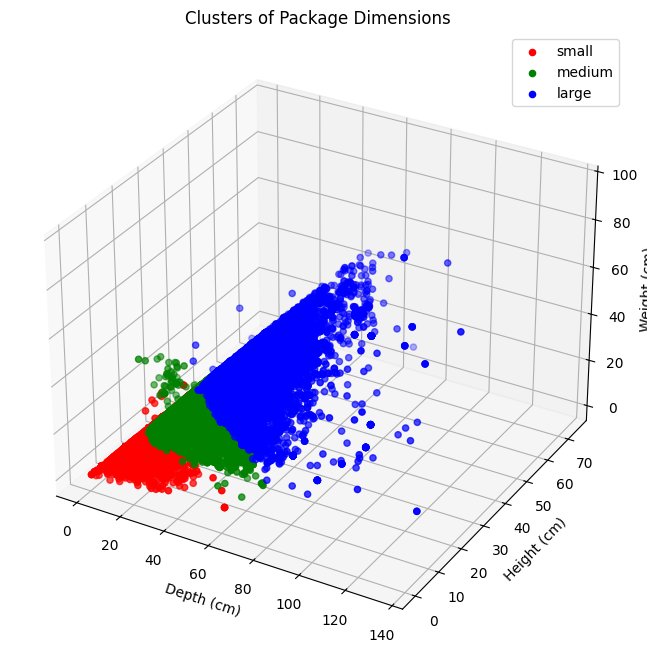

In [47]:
# Visualize the clusters in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = {'small': 'red', 'medium': 'green', 'large': 'blue'}
for cluster_label, color in colors.items():
    cluster_points = combined_dataset[combined_dataset['PackageType'] == cluster_label]
    ax.scatter(cluster_points['depth_cm'], cluster_points['height_cm'], cluster_points['weight_cm'], c=color, label=cluster_label)

ax.set_xlabel('Depth (cm)')
ax.set_ylabel('Height (cm)')
ax.set_zlabel('Weight (cm)')
ax.set_title('Clusters of Package Dimensions')
ax.legend()

plt.show()

/home/b612/sandbox/data-mining/data-mining-2023-II/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/b612/sandbox/data-mining/data-mining-2023-II/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/b612/sandbox/data-mining/data-mining-2023-II/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/b612/sandbox/data-mining/data-mining-202

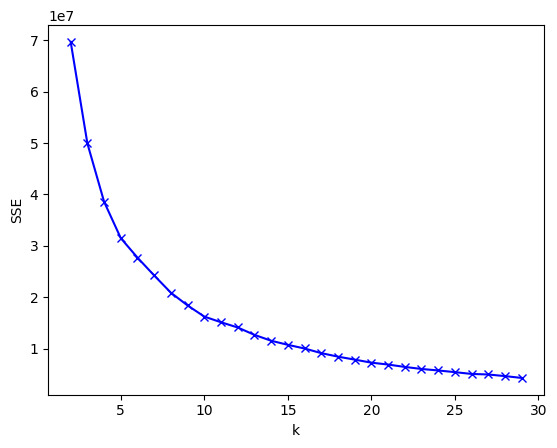

In [61]:
# Plot for elbow method
from sklearn import cluster

Sum_of_squared_distances = []
K = range(2, 30)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(package_dimensions)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [66]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

package_dimensions = combined_dataset[['depth_cm', 'height_cm', 'weight_cm']]

# Standardize the data
scaler = StandardScaler()
scaled_dimensions = scaler.fit_transform(package_dimensions)

# Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=10, random_state=42)
combined_dataset['PackageType'] = kmeans_model.fit_predict(scaled_dimensions)

combined_dataset['PackageType']


/home/b612/sandbox/data-mining/data-mining-2023-II/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0         8
1         7
2         7
3         1
4         2
         ..
714564    6
714565    2
714566    4
714567    2
714568    5
Name: PackageType, Length: 714569, dtype: int32

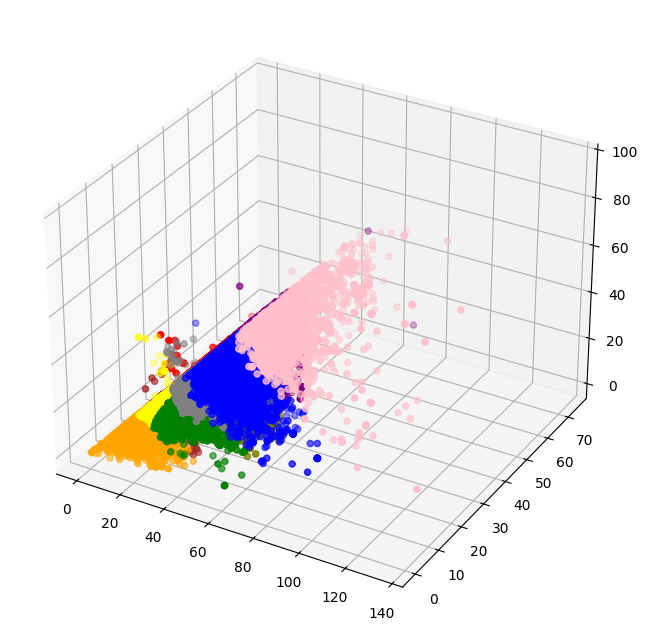

In [67]:
## plot package dimensions and color by cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink', 'brown', 'gray', 'olive', 'cyan', 'magenta', 'black', 'lightblue', 'lightgreen']
for cluster_label, color in zip(range(15), colors):
    cluster_points = combined_dataset[combined_dataset['PackageType'] == cluster_label]
    ax.scatter(cluster_points['depth_cm'], cluster_points['height_cm'], cluster_points['weight_cm'], c=color, label=cluster_label)

In [48]:
combined_dataset

,RouteID,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,Zone,starting_point,StopID,PackageID,planned_service_time_seconds,...,time_to_arrive,day_of_week,month,StartLat,StartLon,StopLat,StopLon,distance_lat,distance_lon,PackageType
0,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AH,PackageID_fd17bd67-a3d8-45b9-936b-c7e9d879102e,31.5,...,703.9,Sunday,6,33.918699,-118.324843,33.885480,-118.344553,0.033219,0.019710,medium
1,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AH,PackageID_f78261e7-4c8c-4d72-b007-9934a53a700b,31.5,...,703.9,Sunday,6,33.918699,-118.324843,33.885480,-118.344553,0.033219,0.019710,small
2,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AJ,PackageID_a8e394ee-4208-412d-8b34-8cbce880a322,40.0,...,670.6,Sunday,6,33.918699,-118.324843,33.902808,-118.355223,0.015891,0.030380,small
3,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AL,PackageID_b7c39ed4-fa0a-497a-ae0c-e3515734f8ae,47.0,...,789.6,Sunday,6,33.918699,-118.324843,33.893616,-118.358108,0.025083,0.033265,medium
4,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AL,PackageID_e980c24b-ab88-4af1-b3f9-1f851823f561,47.0,...,789.6,Sunday,6,33.918699,-118.324843,33.893616,-118.358108,0.025083,0.033265,large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714564,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,YU,PackageID_b0bad72b-041e-4b5b-8303-03131c837b8d,38.3,...,2386.8,Sunday,7,33.965477,-117.653303,34.152862,-117.502335,0.187385,0.150968,large
714565,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,YU,PackageID_b2c6f0de-6fcf-4616-b2cd-ba63ef6d0715,38.3,...,2386.8,Sunday,7,33.965477,-117.653303,34.152862,-117.502335,0.187385,0.150968,large
714566,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,YU,PackageID_3de4b3fd-d80d-4ae7-a519-c82a4e46c48c,38.3,...,2386.8,Sunday,7,33.965477,-117.653303,34.152862,-117.502335,0.187385,0.150968,large
714567,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,ZQ,PackageID_59aae7fe-cbb2-47c8-8c2f-59a97154ccd9,102.0,...,2568.5,Sunday,7,33.965477,-117.653303,34.155712,-117.528523,0.190235,0.124780,large


### 2. Executor capacity classification

In [49]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract the numeric column for clustering
X = combined_dataset[['executor_capacity_cm3']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
combined_dataset['vehicleType'] = kmeans.fit_predict(X_scaled)

# Assign labels based on cluster centroids or any other criteria
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Use pd.qcut to automatically compute quantiles for bin edges
combined_dataset['vehicleType'], bins = pd.qcut(combined_dataset['executor_capacity_cm3'], q=num_clusters, labels=['small', 'medium', 'large'], retbins=True)

# Display the resulting DataFrame
print(combined_dataset[['executor_capacity_cm3', 'vehicleType']])

# Display the bin edges
print("Bin Edges:", bins)


/home/b612/sandbox/data-mining/data-mining-2023-II/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


        executor_capacity_cm3 vehicleType
0                  3539605.75      medium
1                  3539605.75      medium
2                  3539605.75      medium
3                  3539605.75      medium
4                  3539605.75      medium
...                       ...         ...
714564             3539605.75      medium
714565             3539605.75      medium
714566             3539605.75      medium
714567             3539605.75      medium
714568             3539605.75      medium

[714569 rows x 2 columns]
Bin Edges: [3114853.25 3313071.   3539605.75 4672279.5 ]


### 3. Distance classification

In [50]:
import numpy as np
combined_dataset['euclidean_distance'] = np.sqrt(combined_dataset['distance_lat']**2 + combined_dataset['distance_lon']**2)

In [51]:
# Extract the numeric column for clustering
X = combined_dataset[['euclidean_distance']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
combined_dataset['DistanceCategory'] = kmeans.fit_predict(X_scaled)

# Assign labels based on cluster centroids or any other criteria
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Use pd.qcut to automatically compute quantiles for bin edges
combined_dataset['DistanceCategory'], bins = pd.qcut(combined_dataset['euclidean_distance'], q=num_clusters, labels=['small', 'medium', 'large'], retbins=True)

# Display the resulting DataFrame
print(combined_dataset[['euclidean_distance', 'DistanceCategory']])

# Display the bin edges
print("Bin Edges:", bins)


/home/b612/sandbox/data-mining/data-mining-2023-II/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


        euclidean_distance DistanceCategory
0                 0.038626            small
1                 0.038626            small
2                 0.034285            small
3                 0.041662            small
4                 0.041662            small
...                    ...              ...
714564            0.240633            large
714565            0.240633            large
714566            0.240633            large
714567            0.227507            large
714568            0.244263            large

[714569 rows x 2 columns]
Bin Edges: [0.00088684 0.12516178 0.21131368 0.56692664]


array([[<Axes: title={'center': 'euclidean_distance'}>]], dtype=object)

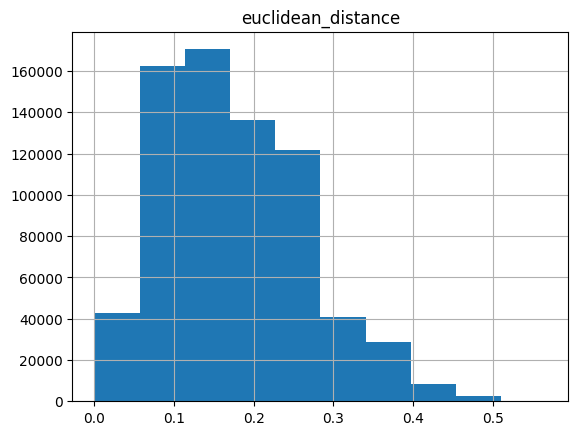

In [52]:
X.hist()

## Asociación

### 1. Preprocess dataset for association

In [53]:
combined_dataset

,RouteID,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,Zone,starting_point,StopID,PackageID,planned_service_time_seconds,...,StartLat,StartLon,StopLat,StopLon,distance_lat,distance_lon,PackageType,vehicleType,euclidean_distance,DistanceCategory
0,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AH,PackageID_fd17bd67-a3d8-45b9-936b-c7e9d879102e,31.5,...,33.918699,-118.324843,33.885480,-118.344553,0.033219,0.019710,medium,medium,0.038626,small
1,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AH,PackageID_f78261e7-4c8c-4d72-b007-9934a53a700b,31.5,...,33.918699,-118.324843,33.885480,-118.344553,0.033219,0.019710,small,medium,0.038626,small
2,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AJ,PackageID_a8e394ee-4208-412d-8b34-8cbce880a322,40.0,...,33.918699,-118.324843,33.902808,-118.355223,0.015891,0.030380,small,medium,0.034285,small
3,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AL,PackageID_b7c39ed4-fa0a-497a-ae0c-e3515734f8ae,47.0,...,33.918699,-118.324843,33.893616,-118.358108,0.025083,0.033265,medium,medium,0.041662,small
4,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AL,PackageID_e980c24b-ab88-4af1-b3f9-1f851823f561,47.0,...,33.918699,-118.324843,33.893616,-118.358108,0.025083,0.033265,large,medium,0.041662,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714564,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,YU,PackageID_b0bad72b-041e-4b5b-8303-03131c837b8d,38.3,...,33.965477,-117.653303,34.152862,-117.502335,0.187385,0.150968,large,medium,0.240633,large
714565,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,YU,PackageID_b2c6f0de-6fcf-4616-b2cd-ba63ef6d0715,38.3,...,33.965477,-117.653303,34.152862,-117.502335,0.187385,0.150968,large,medium,0.240633,large
714566,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,YU,PackageID_3de4b3fd-d80d-4ae7-a519-c82a4e46c48c,38.3,...,33.965477,-117.653303,34.152862,-117.502335,0.187385,0.150968,large,medium,0.240633,large
714567,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,ZQ,PackageID_59aae7fe-cbb2-47c8-8c2f-59a97154ccd9,102.0,...,33.965477,-117.653303,34.155712,-117.528523,0.190235,0.124780,large,medium,0.227507,large


In [54]:
combined_dataset.columns

Index(['RouteID', 'station_code', 'date_YYYY_MM_DD', 'departure_time_utc',
       'executor_capacity_cm3', 'Zone', 'starting_point', 'StopID',
       'PackageID', 'planned_service_time_seconds', 'depth_cm', 'height_cm',
       'weight_cm', 'time_to_arrive', 'day_of_week', 'month', 'StartLat',
       'StartLon', 'StopLat', 'StopLon', 'distance_lat', 'distance_lon',
       'PackageType', 'vehicleType', 'euclidean_distance', 'DistanceCategory'],
      dtype='object')

In [55]:
COMBINED_PROCESSED_DATASET_PATH = "../datasets/processed/combined_dataset.json"

combined_dataset_json = combined_dataset.to_json(orient='records')

with open(COMBINED_PROCESSED_DATASET_PATH, 'w') as file:
    file.write(combined_dataset_json)

In [ ]:
association_dataset = combined_dataset[["Zone", "station_code", "PackageType", "vehicleType", "DistanceCategory"]].copy()

In [ ]:
association_dataset

,Zone,station_code,PackageType,vehicleType,DistanceCategory
0,K-21,DLA8,large,medium,small
1,K-21,DLA8,small,medium,small
2,K-21,DLA8,small,medium,small
3,K-21,DLA8,large,medium,small
4,K-21,DLA8,medium,medium,small
...,...,...,...,...,...
714564,G-18,DLA7,medium,medium,large
714565,G-18,DLA7,medium,medium,large
714566,G-18,DLA7,medium,medium,large
714567,G-18,DLA7,medium,medium,large


### 2. Algoritmo Apriori y evaluación de lift

In [ ]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Convert the DataFrame to a one-hot encoded format
association_dataset_encoded = pd.get_dummies(association_dataset)

# Apply Apriori algorithm to find frequent itemsets with a lower support threshold
frequent_itemsets = apriori(association_dataset_encoded, min_support=0.1, use_colnames=True)

frequent_itemsets.sort_values(by='support', ascending=False)

/home/b612/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
3,0.491468,(PackageType_large)
6,0.422589,(vehicleType_small)
5,0.363026,(PackageType_small)
9,0.333335,(DistanceCategory_small)
11,0.333334,(DistanceCategory_large)
10,0.333331,(DistanceCategory_medium)
7,0.308842,(vehicleType_medium)
8,0.268569,(vehicleType_large)
13,0.204241,"(PackageType_large, vehicleType_small)"
2,0.168335,(station_code_DLA9)


In [ ]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Calculate lift for the rules
rules['lift'] = rules['lift']

# Sort the rules by lift in descending order to get the best rules
sorted_rules = rules.sort_values(by='lift', ascending=False)

# Display the resulting rules
print(sorted_rules)

           antecedents          consequents  antecedent support  \
0  (station_code_DLA9)  (vehicleType_small)            0.168335   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.422589  0.101313    0.601852  1.424202  0.030176    1.450243   

   zhangs_metric  
0        0.35814  


### 3.Algoritmo FP Growth

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Assuming your DataFrame is named association_dataset
# Replace these column names with your actual column names
zone_col = 'Zone'
station_code_col = 'station_code'
package_type_col = 'PackageType'
vehicle_type_col = 'vehicleType'
distance_category_col = 'DistanceCategory'

# Convert the DataFrame to a one-hot encoded format
association_dataset_encoded = pd.get_dummies(association_dataset)

# Apply FP-growth algorithm to find frequent itemsets
frequent_itemsets_fp = fpgrowth(association_dataset_encoded, min_support=0.1, use_colnames=True)

frequent_itemsets_fp.sort_values(by='support', ascending=False)

/home/b612/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.491468,(PackageType_large)
6,0.422589,(vehicleType_small)
4,0.363026,(PackageType_small)
1,0.333335,(DistanceCategory_small)
7,0.333334,(DistanceCategory_large)
8,0.333331,(DistanceCategory_medium)
2,0.308842,(vehicleType_medium)
10,0.268569,(vehicleType_large)
20,0.204241,"(PackageType_large, vehicleType_small)"
9,0.168335,(station_code_DLA9)


In [ ]:
# Generate association rules with a lower confidence threshold
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.5)

# Calculate lift for the rules
rules_fp['lift'] = rules_fp['lift']

# Sort the rules by lift in descending order to get the best rules
sorted_rules_fp = rules_fp.sort_values(by='lift', ascending=False)

# Display the resulting rules
print(sorted_rules_fp)


           antecedents          consequents  antecedent support  \
0  (station_code_DLA9)  (vehicleType_small)            0.168335   
1  (vehicleType_large)  (PackageType_large)            0.268569   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.422589  0.101313    0.601852  1.424202  0.030176    1.450243   
1            0.491468  0.137970    0.513723  1.045281  0.005977    1.045764   

   zhangs_metric  
0       0.358140  
1       0.059226  
